In [4]:
# L'insieme delle funzioni da X:={1,2,...,n} in X è in biiezione con il prodotto cartesiano X^n di X con sé stesso n volte. 
# Per esempio la ennupla (3,3,1,2) rappresenta la funzione f : {1,2,3,4} --> {1,2,3,4} tale che f(1)=3, f(2)=3, f(3)=1 e f(4)=2. Questo insieme lo chiamiamo F.


n=3
X=Set()
L=[]
e=[]

for i in range(n):
    X=X+Set({i+1})
    e.append(i+1)
    
e=tuple(e) # L'ennupla (1,2,3,...,n), che corrisponde alla funzione identità su X.
    
for i in range(n):   # definisce la lista di lunghezza n le cui componenti sono X.
    L.append(X)
    
F=cartesian_product(L) # Il prodotto cartesiano X^n.


In [5]:
# L'insieme delle funzioni monotone da X in X corrisponde alle ennuple ordinate in maniera crescente. 
#Ad esempio, (1,3,3,3) è una funzione monotona da {1,2,3,4} in {1,2,3,4} mentre (1,4,3,3) non lo è. Questo insieme lo chiamiamo M.

M=Set()

for f in F:
    g=tuple(sorted(list(f)))
    M=M+Set({g})
    
print(M.cardinality())

10


In [6]:
# Per n=1,2,3,4,5,6 troviamo che |M|=1,3,10,35,126,462. 
# Se cerchiamo nell'enciclopedia delle successioni intere OEIS https://oeis.org/ troviamo che la cardinalità di M al variare di n definisce la successione A001700. 
# Troviamo anche la formula chiusa |M|=binomial(2(n-1)+1,n-1+1)=binomial(2n-1,n), per n=1,2,3,...
# Z

# L'operazione di composizione di funzioni corrisponde alla composizione di ennuple. La definiamo nel modo seguente.

def comp(a,b):
    v=[]
    for i in range(len(a)):
        v.append(a[b[i]-1])
    return tuple(v)



In [7]:
# Per ogni elemento x in M, definiamo una matrice 10 x 10

ML=sorted(list(M)) # l'insieme M lo facciamo dientare una lista, e la ordiniamo (lessicograficamente).

print(ML)

[(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 2), (1, 2, 3), (1, 3, 3), (2, 2, 2), (2, 2, 3), (2, 3, 3), (3, 3, 3)]


In [8]:
# Data una lista M, questa funzione pos(m,M) mi dice qual è la posizione dell'elemento m in M. E' un numero tra 0 e cardinalità di M meno uno.

def pos(m, M):                         
    for i in range(len(M)):
        if m==M[i]:
            return i

def AA(x):
    A=[]
    for j in range(len(ML)):
        Aj=[]
        z=comp(x,ML[j])
        y=pos(z,ML)
        for k in range(len(ML)):
            if k==y:
                Aj.append(1)
            else:
                Aj.append(0)
        A.append(Aj)
    A=matrix(A) # abbiamo costruito la matrice trasposta della matrice che vogliamo.
    A=A.transpose() # trasponiamo la matrice.
    return A



In [9]:
# Verifichiamo che l'insieme AM:={A(x): x in M} con l'operazione di moltiplicazione righe per colonne è isomorfo a M con l'operazione di composizione, in tre passi.

# Verifichiamo prima che la cardinalità di M è uguale alla cardinalità di AM.

AM=Set()

for x in M:
    A=AA(x)
    A.set_immutable()
    AM=AM+Set({A})

print(M.cardinality()==AM.cardinality())

# Adesso verifichiamo che A(e) è la matrice identità.

print(AA((1,2,3)))

True
[1 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 1]


In [10]:
# Adesso verifichiamo che A(xy)=A(x)A(y) per ogni x,y in M.

u=0
for x in M:
    for y in M:
        xy=comp(x,y)
        if AA(xy)!=AA(x)*AA(y):
            print(x,y)
            u=1
            break
if u==0:
    print('AM e M sono isomorfi come monoidi')

print(ML)

AM e M sono isomorfi come monoidi
[(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 2), (1, 2, 3), (1, 3, 3), (2, 2, 2), (2, 2, 3), (2, 3, 3), (3, 3, 3)]


In [11]:
# Cerchiamo gli elementi invertibili di M, per n=3. 
#In generale è immediato osservare che l'unico elemento invertibile di M è l'identita, perché l'unica ennupla ordinata in modo crescente che abbia tutte le componenti distinte è (1,2,3,...,n).

I=Set() # Questo sarà l'insieme degli elementi invertibili di M. 

for x in M:
	for y in M:
		if comp(x,y)==e and comp(y,x)==e:
			I=I+Set({x})
			break
print(I)


{(1, 2, 3)}


In [12]:
# La seguente funzione mi dice se un sottoinsieme di M è un sottomonoide di M.

def monoide(X):
    u=0
    for a in X:
        for b in X:
            if comp(a,b) not in X:
                u=1
                break
        if u==1:
            break
    if u==1:
        return False
    else:
        return True



In [13]:
# Costruiamo l'insieme di tutti i sottoinsiemi di M che contengono l'identità e. Tra questi cercheremo i sottomonoidi. Per n=3, troviamo 95 sottomonoidi di M.

S=Subsets(M) # Creo l'insieme delle parti di M.

SI=Set() # Creo l'insieme SI dei sottoinsiemi che contengono e. 

for s in S:
    if e in s:
        SI=SI+Set({s})

SM=[] # Creo la lista SM dei sottomonoidi di M.
        
for X in SI:
    if monoide(X)==True:
        SM.append(X)
        
print(len(SM)) 

95


In [14]:

# Definisco una funzione che per ogni sottoinsieme X di M mi dà il sottomonoide SX generato da X.

def subgen(X):
    u=0
    SX=X+Set({e})
    Y=SX
    while u==0:
        for s in SX:
            for t in SX:
                r=comp(s,t)
                Y=Y+Set({r})
        if Y.cardinality()==SX.cardinality():
            u=1
        SX=Y
    return SX

In [15]:
# Definisco la lista SMG dei sottomonoidi di M con un loro insieme minimale di generatori. 
#Creo una lista di liste la cui prima componente #è il sottomonoide e la seconda è un suo insieme minimale di generatori. 
#Troviamo che un insieme minimale di generatori per M è {(1, 1, 3), (1, 2, 2), (2, 3, 3)}.

SMG=[]

for i in range(len(SM)):
    u=0
    for j in range(M.cardinality()):
        for X in M.subsets(j+1):       # M.subsets(j+1) mi dà l'insieme di tutti i sottoinsiemi di M di cardinalità j+1
            if subgen(X)==SM[i]:
                u=1
                SMG.append([SM[i],X])  
                break
        if u==1:
            break

for i in range(len(SMG)):   # Cerchiamo un insieme di generatori minimale per M, cercando M nella lista SMG.
    if SMG[i][0].cardinality()==10:
        print(SMG[i][1], 'insieme di generatori minimale per M')


{(2, 2, 3), (1, 3, 3), (1, 1, 2)} insieme di generatori minimale per M


In [16]:
# Generiamo l'insieme P degli elementi idempotenti di P.  
#Per n=1,2,3,4,5,6 troviamo che |P|=1,3,8,21,55,144. 
#Se cerchiamo nell'enciclopedia delle successioni intere OEIS https://oeis.org/ troviamo che la cardinalità di M al variare di n definisce la successione A001906 (vedere l'interpretazione della sequenza data da Abdullahi Umar). Troviamo che |P|=F(2n), dove F(n) è l'ennesimo nuero di Fibonacci (vedere la sequenza A000045), per n=1,2,3,...



P=Set()
for m in M:
    if comp(m,m)==m:
        P=P+Set({m})
        
print(P.cardinality())



8


In [17]:
# Cerchiamo un insieme minimale di generatori idempotenti per M. Il programma trova l'insieme {(1, 1, 3), (2, 2, 3), (1, 2, 2), (1, 3, 3)}.

u=0
for j in range(P.cardinality()):
        for X in P.subsets(j+1):   
            if subgen(X)==M:
                print(X,'insieme di generatori idempotenti minimale per M')
                u=1
                break
        if u==1:
            break
if u==0:
    print('Non esiste un insieme di generatori idempotenti per M')



{(2, 2, 3), (1, 2, 2), (1, 3, 3), (1, 1, 3)} insieme di generatori idempotenti minimale per M


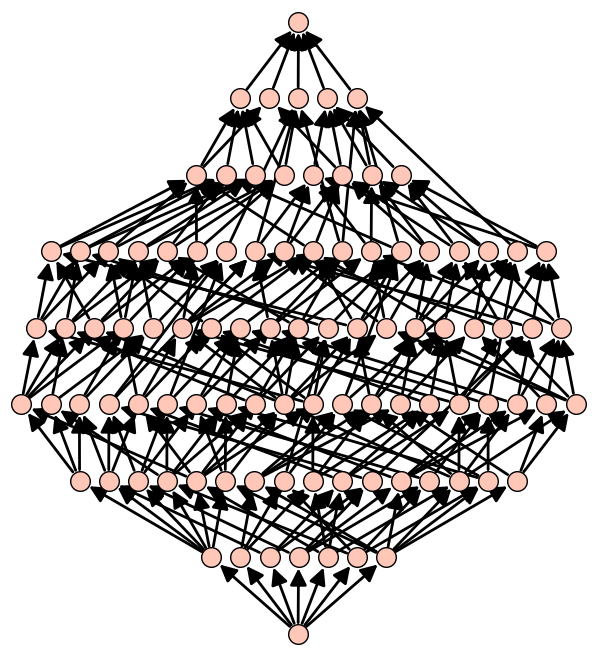

In [18]:
# Se vogliamo rappresentare l'insieme dei sottomonoidi di M ordinati per inclusione, possiamo definire il seguente insieme parzialmente ordinato, e disegnare il sua diagramma di Hasse ( P.plot() )

def ordine(u,v):
        if u.intersection(v)==u:   # u è un sottoinsieme di v se e solo se u intersecato con u è uguale a u. 
                return True
        else:
                return False

def POSET(R):
    elms=R
    return Poset((elms, ordine))


POSET(Set(SM)).plot(label_elements=False, figsize=10)



#Vedere anche Theorem 1.1, Theorem 2.1 e Theorem 2.3 dell'articolo 

#Howie, John M. "Products of idempotents in certain semigroups of transformations." 
#Proceedings of the Edinburgh Mathematical Society 17.3 (1971): 223-236.


